In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
# Cargar datos
df = pd.read_csv('DraftCombine.csv')

# Gráfico de Caja
fig_box = go.Figure()
positions = ['PG', "PG-SG", "SG-PG", 'SG', "SG-SF", "SF-SG", 'SF', "SF-PF", "PF-SF", 'PF', "PF-C", "C-PF", 'C']
filtered_df = df[df['position'].isin(positions)][['position', 'height', "timeLaneAgility", "wingspan"]]

filtered_df.to_json('filtered_data.json', orient='records')

for position in positions:
    fig_box.add_trace(go.Box(y=df[df['position'] == position]['height'], name=position))
fig_box.update_layout(title='Distribución de Altura por Posición')
fig_box


In [14]:
import plotly.express as px
df['primary_position'] = df['position'].apply(lambda x: x.split('-')[0] if isinstance(x, str) else x)

df.dropna(subset=['primary_position', 'standing_vertical', 'max_vertical', 'bench_reps'], inplace=True)


# Crear el gráfico Sunburst
fig = px.treemap(df,
                 path=['primary_position', 'standing_vertical', 'max_vertical', 'bench_reps'],
                  values='drafted',  # Usamos 'drafted' como valor para contar el número de jugadores
                  title='Distribución de Jugadores por Categorías Jerárquicas',
                  color='drafted',  # Colorear por si fueron drafteados o no
                  color_discrete_map={True: 'green', False: 'red'}  # Colores para drafteados y no drafteados
)

# Mostrar la figura
fig.show()


/tmp/ipykernel_8691/2713401553.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



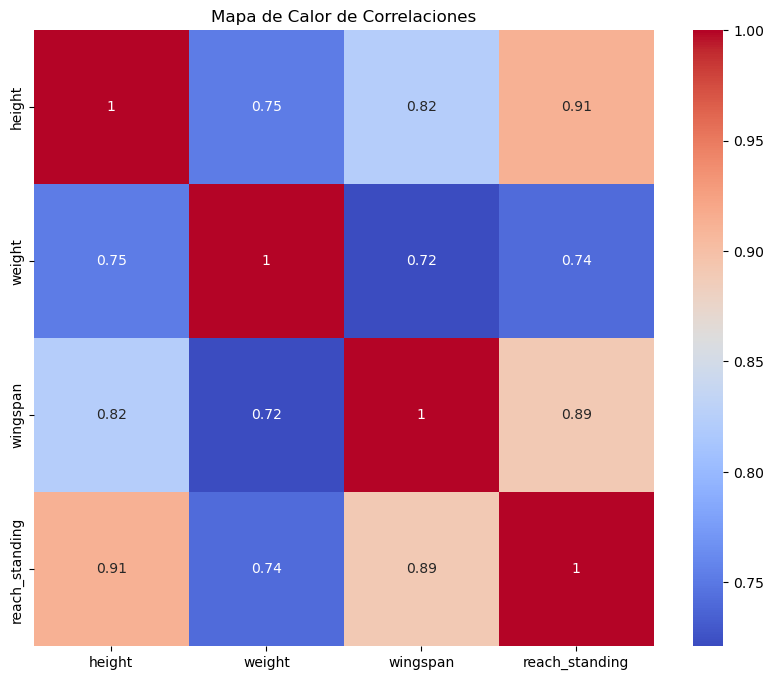

In [5]:
# Mapa de Calor
plt.figure(figsize=(10, 8))
corr_matrix = df[['height', "position", 'weight', 'wingspan', 'reach_standing']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [4]:
position_draft_counts = df.groupby(['position', 'drafted']).size().reset_index(name='count')

# Crear listas para las etiquetas y los enlaces
labels = list(position_draft_counts['position'].unique()) + ['Drafted', 'Not Drafted']
source = []
target = []
value = []

df["position"].dropna()

df['primary_position'] = df['position'].apply(lambda x: x.split('-')[0] if isinstance(x, str) else x)

# Recontar el número de jugadores por posición principal y estado de draft
position_draft_counts = df.groupby(['primary_position', 'drafted']).size().reset_index(name='count')

# Crear listas para las etiquetas y los enlaces
labels = list(position_draft_counts['primary_position'].unique()) + ['Drafted', 'Not Drafted']
source = []
target = []
value = []

# Crear los enlaces entre posiciones y el estado de draft
position_to_index = {position: i for i, position in enumerate(labels)}

for _, row in position_draft_counts.iterrows():
    source.append(position_to_index[row['primary_position']])
    target.append(position_to_index['Drafted'] if row['drafted'] else position_to_index['Not Drafted'])
    value.append(row['count'])

# Crear el diagrama de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

# Añadir título
fig.update_layout(title_text="Flujo de Jugadores desde Posiciones Principales hasta Ser Drafteados o No", font_size=10)

# Mostrar la figura
fig.show()  